# EDA with Pandas - Cumulative Lab

## Introduction

In this section, you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this cumulative lab, you'll get a chance to practice all of these skills with the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.


## Aim

The aim of this study is to investigate the relationship between physical characteristics and house prices.


### Objectives

* To determine if the condition of the house affects the sale prices.
* To analyze the impact of the number of rooms not including bathrooms on the sale price. 
* To examine the correlation between the age of the house and the sale price.
* To investigate the effect of land topography on the sale price. 

Click [here](https://docs.google.com/presentation/d/1ZKmVDnGmzfpK6VdmcpzwXfq_uP1rYQPwHwKtIUL_3O0/edit#slide=id.g11a1187ee66_0_325) 
to get the presentation. 

In [6]:
#Load the data_descripion.txt file from the data folder

with open('data/data_description.txt', 'r') as f:
    data = f.readlines()
    
import pandas as pd
#pd.set_options('display.max_colswidth' , none) #to view whole colunms

df = pd.read_csv('data/data_description.txt' ,delimiter ='|') #,sep = '\n')
df

,MSSubClass: Identifies the type of dwelling involved in the sale.\t
0,20\t1-STORY 1946 & NEWER ALL STYLES
1,30\t1-STORY 1945 & OLDER
2,40\t1-STORY W/FINISHED ATTIC ALL AGES
3,45\t1-1/2 STORY - UNFINISHED ALL AGES
4,50\t1-1/2 STORY FINISHED ALL AGES
...,...
393,"Abnorml\tAbnormal Sale - trade, forecl..."
394,AdjLand\tAdjoining Land Purchase
395,Alloca\tAllocation - two linked propert...
396,Family\tSale between family members


In [8]:
df.shape

(398, 1)

In [9]:
df.head()

,MSSubClass: Identifies the type of dwelling involved in the sale.\t
0,20\t1-STORY 1946 & NEWER ALL STYLES
1,30\t1-STORY 1945 & OLDER
2,40\t1-STORY W/FINISHED ATTIC ALL AGES
3,45\t1-1/2 STORY - UNFINISHED ALL AGES
4,50\t1-1/2 STORY FINISHED ALL AGES


In [10]:
with open('data/data_description.txt', 'r') as f:
    data = f.readlines()

In [11]:
type(data)

list

## Your Task: Explore the Ames Housing Dataset with Pandas

![aerial photo of a neighborhood](images/neighborhood_aerial.jpg)

Photo by <a href="https://unsplash.com/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Matt Donders</a> on <a href="/@mattdonders?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>



### Data Understanding

Each record (row) in this dataset represents a home that was sold in Ames, IA.

Each feature (column) in this dataset is some attribute of that home sale. You can view the file `data/data_description.txt` in this repository for a full explanation of all variables in this dataset — 80 columns in total.

We are going to focus on the following features:

**SalePrice**: `Sale price of the house in dollars`

**TotRmsAbvGrd**: `Total rooms above grade (does not include bathrooms)`

**OverallCond**: `Rates the overall condition of the house`
```
       10	Very Excellent
       9	 Excellent
       8	 Very Good
       7	 Good
       6	 Above Average	
       5	 Average
       4	 Below Average	
       3	 Fair
       2	 Poor
       1	 Very Poor
```

**YrSold**: `Year Sold (YYYY)`

**YearBuilt**: `Original construction date`

**LandSlope**: `Slope of property`
```
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
```

### Requirements

In this lab you will use your data munging and visualization skills to conduct an exploratory analysis of the dataset.

#### 1. Load the Dataset with Pandas

Import pandas with the standard alias `pd` and load the data into a dataframe with the standard name `df`.

#### 2. Explore Data Distributions

Produce summary statistics, visualizations, and interpretive text describing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

#### 3. Explore Differences between Subsets

Separate the data into subsets based on `OverallCond`, then demonstrate how this split impacts the distribution of `SalePrice`.

#### 4. Explore Correlations

Find the features that have the strongest positive and negative correlations with `SalePrice`, and produce plots representing these relationships.

#### 5. Engineer and Explore a New Feature

Create a new feature `Age`, which represents the difference between the year sold and the year built, and plot the relationship between the age and sale price.

## 1. Load the Dataset with Pandas

In the cell below, import:
* `pandas` with the standard alias `pd`
* `matplotlib.pyplot` with the standard alias `plt`

And set `%matplotlib inline` so the graphs will display immediately below the cell that creates them.

In [12]:
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

Now, use pandas to open the file located at `data/ames.csv` ([documentation here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)). Specify the argument `index_col=0` in order to avoid creating an extra `Id` column. Name the resulting dataframe `df`.

In [13]:
# Code to open data\ames.csv
df = pd.read_csv('data/ames.csv', index_col=0)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


The following code checks that you loaded the data correctly:

In [14]:
# Run this cell without changes

# Check that df is a dataframe
assert type(df) == pd.DataFrame

# Check that there are the correct number of rows
assert df.shape[0] == 1460

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert df.shape[1] == 80

Inspect the contents of the dataframe:

In [15]:
# Run this cell without changes
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [16]:
# Run this cell without changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
#To check dataframe summary statistics at a glance.
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
#Check for missing values in the columns of interest
missing = df.isnull().sum()
print(missing)

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [19]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [20]:
df['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14], dtype=int64)

In [21]:
len(df['TotRmsAbvGrd'].unique())

12

## 2. Explore Data Distributions

Write code to produce histograms showing the distributions of `SalePrice`, `TotRmsAbvGrd`, and `OverallCond`.

Each histogram should have appropriate title and axes labels, as well as a black vertical line indicating the mean of the dataset. See the documentation for [plotting histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html), [customizing axes](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend), and [plotting vertical lines](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html#matplotlib.axes.Axes.axvline) as needed.

In [23]:
#Create a condensed dataframe with the columns of interest
dataframe = df[['SalePrice', 'TotRmsAbvGrd', 'OverallCond', 'YrSold', 'YearBuilt', 'LandSlope']]
dataframe

,SalePrice,TotRmsAbvGrd,OverallCond,YrSold,YearBuilt,LandSlope
Id,,,,,,
1,208500,8,5,2008,2003,Gtl
2,181500,6,8,2007,1976,Gtl
3,223500,6,5,2008,2001,Gtl
4,140000,7,5,2006,1915,Gtl
5,250000,9,5,2008,2000,Gtl
...,...,...,...,...,...,...
1456,175000,7,5,2007,1999,Gtl
1457,210000,7,6,2010,1978,Gtl
1458,266500,9,9,2010,1941,Gtl


In [24]:
#Get an overview of the dataset
dataframe.describe()

,SalePrice,TotRmsAbvGrd,OverallCond,YrSold,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.517808,5.575342,2007.815753,1971.267808
std,79442.502883,1.625393,1.112799,1.328095,30.202904
min,34900.000000,2.000000,1.000000,2006.000000,1872.000000
25%,129975.000000,5.000000,5.000000,2007.000000,1954.000000
50%,163000.000000,6.000000,5.000000,2008.000000,1973.000000
75%,214000.000000,7.000000,6.000000,2009.000000,2000.000000
max,755000.000000,14.000000,9.000000,2010.000000,2010.000000


In [22]:
#Value counts for total rooms above grade
df['TotRmsAbvGrd'].value_counts()

6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

In [27]:
dataframe['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [28]:
dataframe['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

### Sale Price

In the cell below, produce a histogram for `SalePrice`.

In [29]:
df['SalePrice']

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [30]:
import numpy as np

sale_price = list(df['SalePrice'])


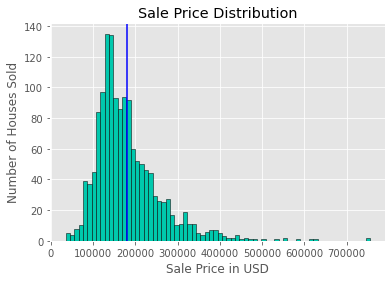

In [34]:
array_sale_price = sale_price
x = [array_sale_price]
bins = 70
plt.style.use('ggplot')
plt.hist(x, bins=bins, edgecolor="black", color="#00C8AD")
plt.title("Sale Price Distribution");
plt.axvline(x=180921.20,  color = 'blue', label = 'axvline - full height')#shows the mean value
plt.xlabel('Sale Price in USD')
plt.ylabel('Number of Houses Sold');
plt.show()

Now, print out the mean, median, and standard deviation:

In [35]:
#Sale Price Mean
array_sale_price = sale_price
summation = np.sum(array_sale_price)
mean_sale_price = ((summation))/len(array_sale_price)
print(f'The mean sale price is: ${mean_sale_price} which is represented by the blue vertical line on the histogram')

The mean sale price is: $180921.19589041095 which is represented by the blue vertical line on the histogram


In [36]:
#Method 2 for Sale Price Mean
np.mean(np.array(sale_price))

180921.19589041095

In [37]:
median = np.median(array_sale_price)
print(f'The median sale price is: ${median}')

The median sale price is: $163000.0


In [38]:
#std deviation
#Find Absolute Deviation
absolute_dev =np.abs (np.array(sale_price)-np.mean(np.array(sale_price)))

#Absolute average Deviation
absolute_av_dev = np.sum(absolute_dev) / len(absolute_dev)
print(f'The Absolute Average Deviation is:{absolute_av_dev}')

#Variance
squares = np.power(absolute_dev,2)
variance = np.sum(squares)/ len(sale_price)
print(f'The Variance is :{variance}')

The Absolute Average Deviation is:57434.77027584912
The Variance is :6306788585.349299


In [39]:
import statistics as st
print(f'The mode sale price is:{(st.mode(array_sale_price))}')

The mode sale price is:140000


In [40]:
seventy_fifth_percentile = np.percentile(sale_price, 75)
print(f'The 75th pecerntile starts at:{seventy_fifth_percentile}')
twenty_fifth_percentile = np.percentile(sale_price, 25)
print(f'The 25th pecerntile starts at:{twenty_fifth_percentile}')
IQR = np.percentile(sale_price, 75) - np.percentile(sale_price, 25)
print(f'The Inter Quartile Range is:{IQR} where the bulk of the sale price values lie.')

The 75th pecerntile starts at:214000.0
The 25th pecerntile starts at:129975.0
The Inter Quartile Range is:84025.0 where the bulk of the sale price values lie.


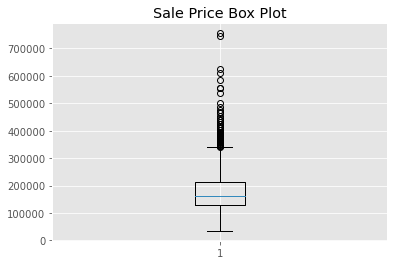

In [31]:
#Clear depiction of where IQR lies
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
x = [sale_price]
plt.boxplot(x)
plt.title ("Sale Price Box Plot")
plt.show()

In the cell below, interpret the above information.

#### Findings

* The mean sale price is: 180921.20 USD
* The median sale price is: 163000.0 USD
* The Absolute Average Deviation is: 57434.77 from the mean value.
* The Variance is : 6306788585.35

#### Interpretation
* The sale price distribution is positively skewed with an outlier at a sale price above 700,000 USD. 
* The maximum value of the Sale price was 755,000 USD which is the outlier here.
* The minimum sale price was 34,900 USD. 
* The mode sale price is 140000 USD which means that majority of the houses sold for this amount.
* Most Houses sold were inbetween 129,975 USD to 214,000 USD as shown by the Interquartile Range(IQR)
* In this case the median may be considered as a better measure of central tendancy for the sale price distribution.

### Total Rooms Above Grade

In the cell below, produce a histogram for `TotRmsAbvGrd`.

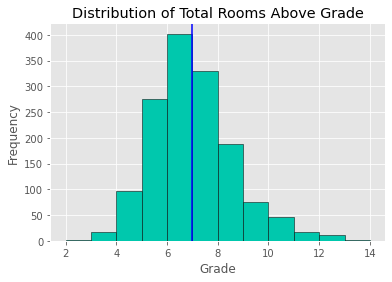

In [42]:
# Plot Histogram for the Total Rooms Above Grade
total_rooms_above_grade = list(df['TotRmsAbvGrd'])
array_total_rooms_above_grade = total_rooms_above_grade
x = [array_total_rooms_above_grade]
bins =12
plt.hist(x, bins=bins, edgecolor="black", color="#00C8AD")
plt.title("Distribution of Total Rooms Above Grade");
plt.axvline(x=7,  color = 'blue', label = 'axvline - full height') # shows the mean
plt.xlabel('Grade')
plt.ylabel('Frequency');
plt.show()

Now, print out the mean, median, and standard deviation:

In [47]:
# Mean
total_rooms_above_grade = list(df['TotRmsAbvGrd'])
array_total_rooms_above_grade = total_rooms_above_grade
summation = np.sum(array_total_rooms_above_grade)
mean_total_rooms_above_grade = round((summation)/len(array_total_rooms_above_grade))
print(f'The mean number of Total Rooms Above Grade is: {mean_total_rooms_above_grade}')

#Median
median = np.median(array_total_rooms_above_grade)
print(f'The median value for the total rooms above grade is: {median}')

#Mode
print(f'The mode is:{(st.mode(array_total_rooms_above_grade))}')

#Standard Deviation
#Find Absolute Deviation
absolute_dev =np.abs (np.array(total_rooms_above_grade)-np.mean(np.array(total_rooms_above_grade)))

#Absolute average Deviation
absolute_av_dev = np.sum(absolute_dev) / len(absolute_dev)
print(f'The Absolute Average Deviation is:{absolute_av_dev}')

#Variance
squares = np.power(absolute_dev,2)
variance = np.sum(squares)/ len(total_rooms_above_grade)
print(f'The Variance is :{variance}')

#Percentiles
seventy_fifth_percentile = np.percentile(total_rooms_above_grade, 75)
print(f'The 75th pecerntile starts at:{seventy_fifth_percentile}')
twenty_fifth_percentile = np.percentile(total_rooms_above_grade, 25)
print(f'The 25th pecerntile starts at:{twenty_fifth_percentile}')
IQR = np.percentile(total_rooms_above_grade, 75) - np.percentile(total_rooms_above_grade, 25)
print(f'The Inter Quartile Range is:{IQR} where the bulk of Total number of rooms above grade values lie.')


The mean number of Total Rooms Above Grade is: 7.0
The median value for the total rooms above grade is: 6.0
The mode is:6
The Absolute Average Deviation is:1.2795946706699195
The Variance is :2.6400938262338145
The 75th pecerntile starts at:7.0
The 25th pecerntile starts at:5.0
The Inter Quartile Range is:2.0 where the bulk of Total number of rooms above grade values lie.


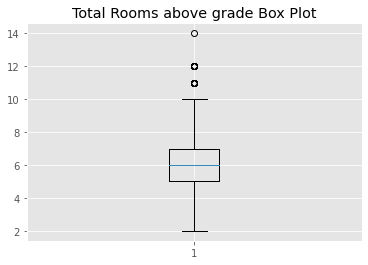

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
x = [array_total_rooms_above_grade]
plt.boxplot(x)
plt.title ("Total Rooms above grade Box Plot")
plt.show()

In the cell below, interpret the above information.

#### Findings

* The mean number of Total Rooms Above Grade is: 7.0
* The median value for the total rooms above grade is: 6.0
* The mode is:6
* The Absolute Average Deviation is: 1.28
* The Variance is :2.64
* The 75th pecerntile starts at:7.0
* The 25th pecerntile starts at:5.0
* The Inter Quartile Range is:2.0 where the bulk of Total number of rooms above grade values lie.

#### Interpretation

* The distribution is somewhat symmetical as the measures of central tendancy fall in the middle of the distribution.
* The majority of the home buyers opted for 5 to 7 rooms not inclding the bathrooms when purchasing a property as shown by the IQR (between 5.5 to 7.5).
* Both 1 and 14 rooms were not favoured bt home buyers.

### Overall Condition

In the cell below, produce a histogram for `OverallCond`.

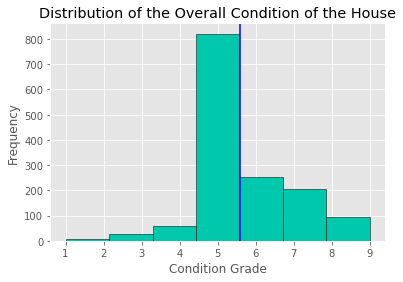

In [44]:
overall_cond = list(df['OverallCond'])
array_overall_condition= overall_cond
x = [array_overall_condition]
bins = 7
plt.hist(x, bins=bins, edgecolor="black", color="#00C8AD")
plt.title("Distribution of the Overall Condition of the House");
plt.axvline(x=5.575342,  color = 'blue', label = 'axvline - full height')
plt.xlabel('Condition Grade')
plt.ylabel('Frequency');
plt.show()


Now, print out the mean, median, and standard deviation:

In [45]:
#Mean
mean = np.mean(np.array(overall_cond))
print(f'The mean is:{mean}')

#Median
median = np.median((overall_cond))
print(f'The median value for the total rooms above grade is: {median}')

#Mode
print(f'The mode is:{(st.mode((overall_cond)))}')

#Standard Deviation
#Find Absolute Deviation
absolute_dev =np.abs (np.array((overall_cond))-np.mean(np.array((overall_cond))))

#Absolute average Deviation
absolute_av_dev = np.sum(absolute_dev) / len(absolute_dev)
print(f'The Absolute Average Deviation is:{absolute_av_dev}')

#Variance
squares = np.power(absolute_dev,2)
variance = np.sum(squares)/ len((overall_cond))
print(f'The Variance is :{variance}')

#Percentiles
seventy_fifth_percentile = np.percentile((overall_cond), 75)
print(f'The 75th pecerntile starts at:{seventy_fifth_percentile}')
twenty_fifth_percentile = np.percentile((overall_cond), 25)
print(f'The 25th pecerntile starts at:{twenty_fifth_percentile}')
IQR = np.percentile((overall_cond), 75) - np.percentile((overall_cond), 25)
print(f'The Inter Quartile Range is:{IQR} where the bulk of the overall condition values lie.')


The mean is:5.575342465753424
The median value for the total rooms above grade is: 5.0
The mode is:5
The Absolute Average Deviation is:0.8890223306436479
The Variance is :1.237474197785701
The 75th pecerntile starts at:6.0
The 25th pecerntile starts at:5.0
The Inter Quartile Range is:1.0 where the bulk of the overall condition values lie.


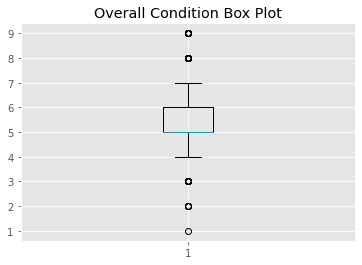

In [39]:
#Box plot to understand IQR value
plt.style.use('ggplot')
x = [array_overall_condition]
plt.boxplot(x)
plt.title ("Overall Condition Box Plot")
plt.show()

#### Findings
* The mean is:5.575342465753424
* The median value for the total rooms above grade is: 5.0
* The mode is:5
* The Absolute Average Deviation is:0.8890223306436479
* The Variance is :1.237474197785701
* The 75th pecerntile starts at:6.0
* The 25th pecerntile starts at:5.0
* The Inter Quartile Range is:1.0 where the bulk of the overall condition values lie.

#### Interpretation
* Despite the apperance of the histogram, the distribution can be assumbed to be symetrical as mode, mean, and median are almost similar.
* Most buyers opted for homes with a grade ranking between 5 and 6. 

## 3. Explore Differences between Subsets

As you might have noted in the previous step, the overall condition of the house seems like we should treat it as more of a categorical variable, rather than a numeric variable.

One useful way to explore a categorical variable is to create subsets of the full dataset based on that categorical variable, then plot their distributions based on some other variable. Since this dataset is traditionally used for predicting the sale price of a house, let's use `SalePrice` as that other variable.

In the cell below, create three variables, each of which represents a record-wise subset of `df` (meaning, it has the same columns as `df`, but only some of the rows).

* `below_average_condition`: home sales where the overall condition was less than 5
* `average_condition`: home sales where the overall condition was exactly 5
* `above_average_condition`: home sales where the overall condition was greater than 5

In [48]:
# Replace None with appropriate code
below_average_condition = df.loc[df['OverallCond'] < 5] 
average_condition = df.loc[df['OverallCond'] == 5]
above_average_condition = df.loc[df['OverallCond'] > 5]

The following code checks that you created the subsets correctly:

In [49]:
# Run this cell without changes

# Check that all of them still have 80 columns
assert below_average_condition.shape[1] == 80
assert average_condition.shape[1] == 80
assert above_average_condition.shape[1] == 80

# Check the numbers of rows of each subset
assert below_average_condition.shape[0] == 88
assert average_condition.shape[0] == 821
assert above_average_condition.shape[0] == 551

The following code will produce a plot of the distributions of sale price for each of these subsets:

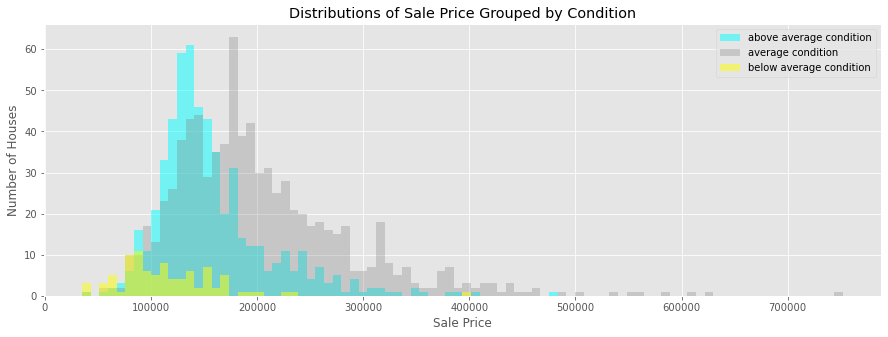

In [50]:
# Run this cell without changes

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=above_average_condition["SalePrice"],
    label="above average condition",
    bins=bins,
    color="cyan",
    alpha=0.5
)
ax.hist(
    x=average_condition["SalePrice"],
    label="average condition",
    bins=bins,
    color="gray",
    alpha=0.3
)
ax.hist(
    x=below_average_condition["SalePrice"],
    label="below average condition",
    bins=bins,
    color="yellow",
    alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Condition")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses")
ax.legend();

#### Interpretation  
* The overall condition of the houses affected the number of houses sold in Ames - Iowa betweeen the year 2006 and 2010.
* Majority of the houses sold were of average overall condition that is they were ranked 5.
* Most of the houses that were ranked below avaerage  sold for under 200,000 USD.
* It was surprising to note that most buyers would opt for average overall conditons as opposed to above average.
* Most of the homes purchased that were of above average condition were between 100,000 USD to 200,000 USD


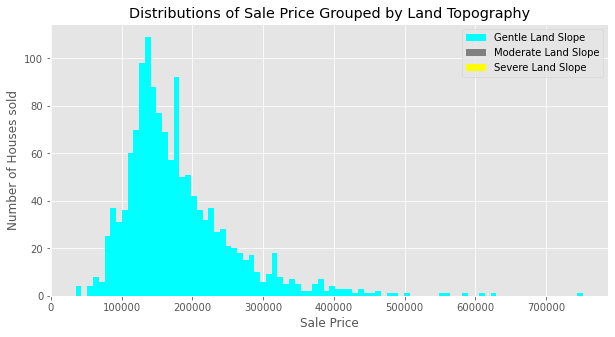

In [66]:
#Check Land Slope againt Sale Price 

Gentle = df.loc[df['LandSlope'] == 'Gtl'] 
Moderate = df.loc[df['OverallCond'] == 'Mod']
Severe = df.loc[df['OverallCond'] == 'Sev']


# Set up plot
fig, ax = plt.subplots(figsize=(10,5))

# Create custom bins so all are on the same scale
bins = range(df["SalePrice"].min(), df["SalePrice"].max(), int(df["SalePrice"].median()) // 20)

# Plot three histograms, with reduced opacity (alpha) so we
# can see them overlapping
ax.hist(
    x=Gentle["SalePrice"],
    label="Gentle Land Slope",
    bins=bins,
    color="cyan",
    #alpha=0.5
)
ax.hist(
    x=Moderate["SalePrice"],
    label="Moderate Land Slope",
    bins=bins,
    color="gray",
    #alpha=0.3
)
ax.hist(
    x=Severe["SalePrice"],
    label="Severe Land Slope",
    bins=bins,
    color="yellow",
    #alpha=0.5
)

# Customize labels
ax.set_title("Distributions of Sale Price Grouped by Land Topography")
ax.set_xlabel("Sale Price")
ax.set_ylabel("Number of Houses sold")
ax.legend();

In [62]:
df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [73]:
percentage = (1382/1460)*100
percentage

94.65753424657535

#### Interpretation
* The topography of the land where houses are built greatly affects the purchasing behaviour. 
* From the dataset, 95% of the houses sold were on gently sloping land, 4% of the houses on moderately sloping land and 1% on severly sloping land.
* This infers that majority of home buyers prefer houses in area with gentle slopes.

## 4. Explore Correlations

To understand more about what features of these homes lead to higher sale prices, let's look at some correlations. We'll return to using the full `df`, rather than the subsets.

In the cell below, print out both the name of the column and the Pearson correlation for the column that is ***most positively correlated*** with `SalePrice` (other than `SalePrice`, which is perfectly correlated with itself).

We'll only check the correlations with some kind of numeric data type.

You can import additional libraries, although it is possible to do this just using pandas.

In [48]:
import pandas as pd

dataframe.corr()


,SalePrice,TotRmsAbvGrd,OverallCond,YrSold,YearBuilt
SalePrice,1.000000,0.533723,-0.077856,-0.028923,0.522897
TotRmsAbvGrd,0.533723,1.000000,-0.057583,-0.034516,0.095589
OverallCond,-0.077856,-0.057583,1.000000,0.043950,-0.375983
YrSold,-0.028923,-0.034516,0.043950,1.000000,-0.013618
YearBuilt,0.522897,0.095589,-0.375983,-0.013618,1.000000


Now, find the ***most negatively correlated*** column:

In [44]:
print(dataframe['SalePrice'].corr(dataframe['OverallCond']))
 

-0.07785589404867803


Once you have your answer, edit the code below so that it produces a box plot of the relevant columns.

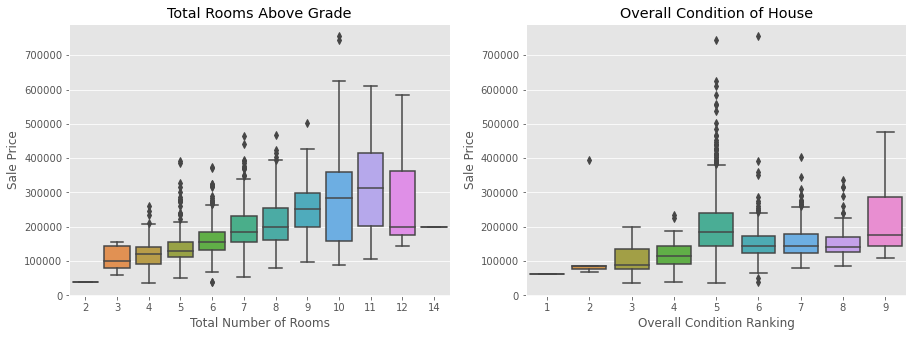

In [53]:
# Replace None with appropriate code

import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df['TotRmsAbvGrd'],
    y=df["SalePrice"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df['OverallCond'],
    y=df['SalePrice'],
    ax=ax2
)

# Customize labels
ax1.set_title('Total Rooms Above Grade')
ax1.set_xlabel('Total Number of Rooms')
ax1.set_ylabel("Sale Price")
ax2.set_title('Overall Condition of House')
ax2.set_xlabel('Overall Condition Ranking')
ax2.set_ylabel("Sale Price");

Interpret the results below. Consult `data/data_description.txt` as needed.

#### Interpretation 
* Houses that had an overall condition ranking of 9 all sold for under 300,000 USD
* The houses that whose overall condition ranked at 5 had the most number of houses sold and with a bigger range in selling price that is from over 100,000 USD to 700,000 USD. 
* The sale price of the houses increased with the total number of rooms(not including bathrooms).
* The houses that sold for over 700,000 USD all had 10 rooms in total.

* The boxplots above infere that the overall condition of the house coupled with the total number of rooms affect the sale price.

## 5. Engineer and Explore a New Feature

Here the code is written for you, all you need to do is interpret it.

We note that the data spans across several years of sales:

In [74]:
# Run this cell without changes
df["YrSold"].value_counts().sort_index()

2006    314
2007    329
2008    304
2009    338
2010    175
Name: YrSold, dtype: int64

Maybe we can learn something interesting from the age of the home when it was sold. This uses information from the `YrBuilt` and `YrSold` columns, but represents a truly distinct feature.

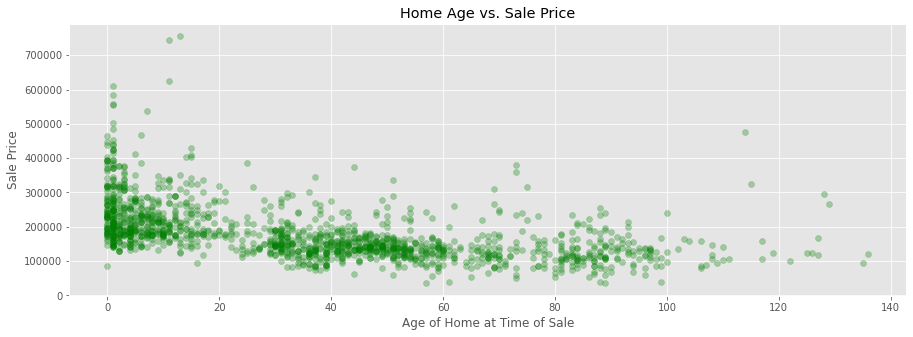

In [79]:
# Run this cell without changes

# Make a new column, Age
df["Age"] = df["YrSold"] - df["YearBuilt"]

# Set up plot
fig, ax = plt.subplots(figsize=(15,5))

# Plot Age vs. SalePrice
ax.scatter(df["Age"], df["SalePrice"], alpha=0.3, color="green")
ax.set_title("Home Age vs. Sale Price")
ax.set_xlabel("Age of Home at Time of Sale")
ax.set_ylabel("Sale Price");

#### Interpretation
* The age of the house  and the selling price are inversley proportional with older houses selling for lower prices.
* Most houses over 120 years old sold for under 200,000 USD.
* Homes that sold for over 600,000 USD were all under 20 years of age.
* The most popular age range was between 0 to 60 years.

## Summary
* The data used for this stady was made available by Ames - Iowa housing. The study seeked to investigate the factors affecting the sale price of the houses.
 * The variables used for this study were:
 ** Sale price
 ** Overall condition of the house
 ** Total number of rooms excluding the bathrooms
 ** Age of the house 
 ** Topography of the land on which the house is built.
 
* The sale price increased with an increase in the total number of rooms and decreased with and increase in age.
* The overall condition also affected the sale price and the number of houses sold.
* Houses ranked average or above average were more popular among buyers.
* Nearly all of the houses that were purchased stood on gently sloping land.   

## Recomendations

#### For Developers and the Council of  Housing 
* If more houses are to be sold in Ames-Iowa, the developers could consider new builds(0 years) on gently sloping land.
* The ideal number of total rooms excluding bathrooms would be 6.

#### For Real-Estate Agencies
* Older houses may be less attractive to home buyers therefore, lower sale prices may sway them towards buying older houses.
* When selling, the overall condition of the house affects the sale price, therefore agencies can encourage home owners looking to sell to improve the overall condition of their houses i.e by painting, remodeling or tidying the exterior.  